In [143]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from IPython import display
display.set_matplotlib_formats('svg')

生成数据

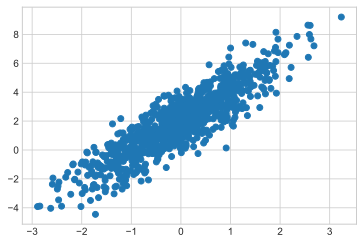

In [144]:
def gen(w,b,num):
    x = np.random.normal(0,1,(num,w.shape[0]))
    y = np.dot(x,w)+b
    y += np.random.normal(0,0.01,y.shape)
    return x,y

true_w,true_b = np.array([1,2]), 2
x,y = gen(true_w,true_b,1000)
x = np.append(x,np.ones(x.shape[0]).reshape(-1,1),axis=1)

# print(x)
# print(y)
plt.scatter(x[:,(1)],y[:])

dataloader

In [145]:
def data_loader(x,y,batch_size):
    nums = len(x)
    indices = list(range(nums))
    random.shuffle(indices)
    for i in range(0,nums,batch_size):
        batch_indices = indices[i:min(i+batch_size,nums)]
        yield x[batch_indices],y[batch_indices]
    

In [146]:
# batch_size = 10
# for x_batch,y_batch in data_loader(x,y,batch_size):
#     print(x_batch.shape)

初始化参数

In [147]:
w = np.random.normal(0,0.01,size=(2,1))
b = np.zeros(1)
param = np.append(w,b).reshape(-1,1)

定义模型

In [148]:
def model(x,theta):
    return np.dot(x,theta)

定义损失函数

In [149]:
def loss(y,y_pred):
    return np.mean((y.reshape(y_pred.shape)-y_pred)**2)/2

定义优化器

In [150]:
def gradient(theta, xi, yi):
    return xi.T.dot(xi.dot(theta)-yi.reshape(-1,1))

In [151]:
def l2_clip(v,b):
    norm =np.linalg.norm(v,ord=2)
    if norm > b:
        return b*(v/norm)

    else:
        return v

In [152]:
def gaussian_mech_vec(v, sensitivity, epsilon, delta):
    return v + np.random.normal(loc=0, scale=sensitivity * np.sqrt(2*np.log(1.25/delta)) / epsilon, size=len(v))

In [153]:
def sgd(xx,yy,param,learning_rate,sensitivity,epsilon,delta):
    y_pred = model(xx,param)
    loss_ = loss(yy,y_pred)
    grads = []
    for sample_x,sample_y in zip(xx,yy):
        sample_x = sample_x.reshape(1,-1)
        sample_y = sample_y.reshape(1,-1)
        grad = l2_clip(gradient(param,sample_x,sample_y),sensitivity)
        grads.append(grad)
    gradient_ = sum(grads) / xx.shape[0]
    # gradient_ = gradient(param,xx,yy)
    param -= learning_rate * gradient_
    param = gaussian_mech_vec(param, sensitivity, epsilon, delta)

训练

In [154]:
def train(x,y,theta,learning_rate,epochs,batch_size,sensitivity,epsilon,delta):
    losses=[]
    for i in range(epochs):
        for input, label in data_loader(x,y,batch_size):
            sgd(input,label,theta,learning_rate,sensitivity,epsilon,delta)
        print('epoch:%d, loss:%f'%(i,loss(y,model(x,theta))))
        losses.append(loss(y,model(x,theta)))
    return losses

超参数设置

In [155]:
learning_rate = 0.001
epochs = 100
batch_size = 10
sensitivity = 1
epsilon = 0.01
delta = 1e-5

训练模型

In [156]:
history = train(x,y,param,learning_rate,epochs,batch_size,sensitivity,epsilon,delta)

epoch:0, loss:4.090552
epoch:1, loss:3.953224
epoch:2, loss:3.818686
epoch:3, loss:3.686920
epoch:4, loss:3.557894
epoch:5, loss:3.431575
epoch:6, loss:3.307945
epoch:7, loss:3.186995
epoch:8, loss:3.068689
epoch:9, loss:2.953016
epoch:10, loss:2.839952
epoch:11, loss:2.729493
epoch:12, loss:2.621593
epoch:13, loss:2.516239
epoch:14, loss:2.413404
epoch:15, loss:2.313065
epoch:16, loss:2.215209
epoch:17, loss:2.119822
epoch:18, loss:2.026884
epoch:19, loss:1.936375
epoch:20, loss:1.848289
epoch:21, loss:1.762595
epoch:22, loss:1.679276
epoch:23, loss:1.598301
epoch:24, loss:1.519657
epoch:25, loss:1.443318
epoch:26, loss:1.369267
epoch:27, loss:1.297496
epoch:28, loss:1.227968
epoch:29, loss:1.160675
epoch:30, loss:1.095597
epoch:31, loss:1.032735
epoch:32, loss:0.972059
epoch:33, loss:0.913555
epoch:34, loss:0.857211
epoch:35, loss:0.802992
epoch:36, loss:0.750896
epoch:37, loss:0.700887
epoch:38, loss:0.652957
epoch:39, loss:0.607093
epoch:40, loss:0.563239
epoch:41, loss:0.521411
ep

In [157]:
param

array([[0.99681234],
       [1.98963772],
       [1.99583959]])

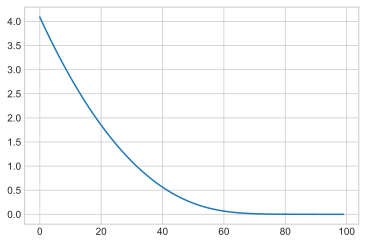

In [158]:
plt.plot(history)